In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/panicpotatoe/dataset-practical-stats/main/ds_salaries.csv")
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
731,2023,SE,FT,Data Architect,113900,USD,113900,US,100,US,M
3406,2022,MI,FT,Data Scientist,200000,USD,200000,US,100,US,M
740,2023,MI,FT,Machine Learning Engineer,150000,USD,150000,US,0,US,M
2152,2022,SE,FT,ML Engineer,243000,USD,243000,US,100,US,M
159,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M


In [14]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [30]:
cols = [
    "work_year",
    "company_location",
    "salary_in_usd",
    "remote_ratio",
    "experience_level",
    "employment_type",
    "job_title",
]

df2 = df[cols]
df2

,work_year,company_location,salary_in_usd,remote_ratio,experience_level,employment_type,job_title
0,2023,ES,85847,100,SE,FT,Principal Data Scientist
1,2023,US,30000,100,MI,CT,ML Engineer
2,2023,US,25500,100,MI,CT,ML Engineer
3,2023,CA,175000,100,SE,FT,Data Scientist
4,2023,CA,120000,100,SE,FT,Data Scientist
...,...,...,...,...,...,...,...
3750,2020,US,412000,100,SE,FT,Data Scientist
3751,2021,US,151000,100,MI,FT,Principal Data Scientist
3752,2020,US,105000,100,EN,FT,Data Scientist
3753,2020,US,100000,100,EN,CT,Business Data Analyst


In [18]:
!pip install -U scikit-learn scipy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [33]:
df2['num_exp_level'] = le.fit_transform(df2['experience_level'])
df2['num_emp_type'] = le.fit_transform(df2['employment_type'])
df2['num_job_title'] = le.fit_transform(df2['job_title'])
df2['num_company_location'] = le.fit_transform(df2['company_location'])
df2

C:\Users\phucd\AppData\Local\Temp\ipykernel_7088\3124714243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_exp_level'] = le.fit_transform(df2['experience_level'])
C:\Users\phucd\AppData\Local\Temp\ipykernel_7088\3124714243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_emp_type'] = le.fit_transform(df2['employment_type'])
C:\Users\phucd\AppData\Local\Temp\ipykernel_7088\3124714243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,work_year,company_location,salary_in_usd,remote_ratio,experience_level,employment_type,job_title,num_exp_level,num_emp_type,num_job_title,num_company_location
0,2023,ES,85847,100,SE,FT,Principal Data Scientist,3,2,84,25
1,2023,US,30000,100,MI,CT,ML Engineer,2,0,66,70
2,2023,US,25500,100,MI,CT,ML Engineer,2,0,66,70
3,2023,CA,175000,100,SE,FT,Data Scientist,3,2,47,12
4,2023,CA,120000,100,SE,FT,Data Scientist,3,2,47,12
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,US,412000,100,SE,FT,Data Scientist,3,2,47,70
3751,2021,US,151000,100,MI,FT,Principal Data Scientist,2,2,84,70
3752,2020,US,105000,100,EN,FT,Data Scientist,0,2,47,70
3753,2020,US,100000,100,EN,CT,Business Data Analyst,0,0,17,70


In [34]:
df2_corr = df2.corr()
df2_corr

C:\Users\phucd\AppData\Local\Temp\ipykernel_7088\2434562719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2_corr = df2.corr()


,work_year,salary_in_usd,remote_ratio,num_exp_level,num_emp_type,num_job_title,num_company_location
work_year,1.000000,0.228290,-0.236430,0.187748,0.011127,-0.026862,0.234661
salary_in_usd,0.228290,1.000000,-0.064171,0.327173,-0.010329,0.120875,0.405183
remote_ratio,-0.236430,-0.064171,1.000000,-0.054025,-0.028673,-0.042451,-0.071574
num_exp_level,0.187748,0.327173,-0.054025,1.000000,-0.032794,0.020026,0.250591
num_emp_type,0.011127,-0.010329,-0.028673,-0.032794,1.000000,-0.052231,-0.013963
num_job_title,-0.026862,0.120875,-0.042451,0.020026,-0.052231,1.000000,-0.073549
num_company_location,0.234661,0.405183,-0.071574,0.250591,-0.013963,-0.073549,1.000000


In [35]:
import seaborn as sns

<Axes: >

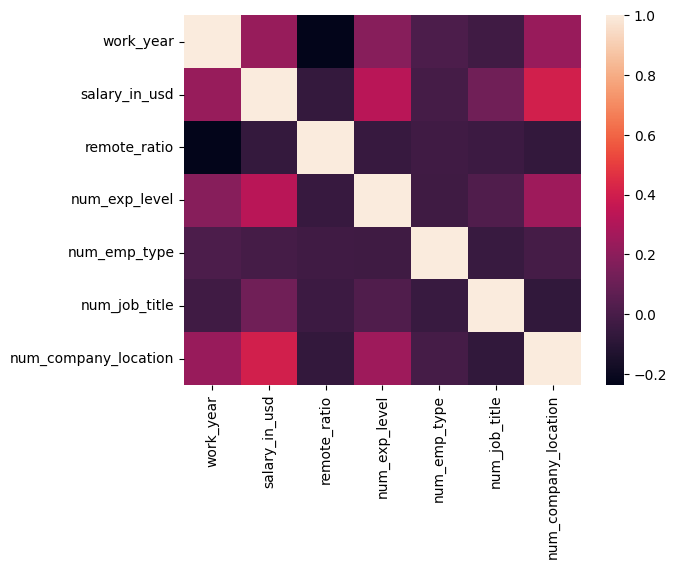

In [39]:
sns.heatmap(df2_corr)